In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/WFH_WFO_dataset.csv")

In [4]:
df

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,Nandini,32,Engineer,Female,Yes,Yes,Yes,Yes,Yes,CALMER,4,1,5,Yes,3,3,Not sure,1
203,204,Matt,52,Business,Male,Yes,Yes,Yes,Yes,Yes,CALMER,4,4,4,Yes,5,3,No,1
204,205,Rithik,22,Marketing,Male,Yes,No,Yes,Yes,No,STRESSED,4,4,4,No,4,3,Not sure,0
205,206,Radha,25,Marketing,Female,No,Yes,Yes,No,No,STRESSED,5,3,5,Yes,1,3,No,0


Data Exploration and Preprocessing

In [40]:
df.describe()

,ID,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.000000,2.748792,0.483092,0.516908,0.289855,0.753623,0.652174,0.449275,0.608696,3.086957,3.101449,3.623188,0.478261,3.043478,3.521739,1.144928,0.405797
std,59.899917,1.998710,0.500925,0.510524,0.454795,0.431945,0.477435,0.498626,0.489225,1.089301,1.255801,0.996617,0.500738,1.247539,1.004002,0.749279,0.492236
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,52.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,104.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,4.000000,0.000000,3.000000,3.000000,1.000000,0.000000
75%,155.500000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,2.000000,1.000000
max,207.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,2.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           207 non-null    int64 
 1   Name                         207 non-null    object
 2   Age                          207 non-null    int64 
 3   Occupation                   207 non-null    object
 4   Gender                       207 non-null    object
 5   Same_ofiice_home_location    207 non-null    object
 6   kids                         207 non-null    object
 7   RM_save_money                207 non-null    object
 8   RM_quality_time              207 non-null    object
 9   RM_better_sleep              207 non-null    object
 10  calmer_stressed              207 non-null    object
 11  RM_professional_growth       207 non-null    int64 
 12  RM_lazy                      207 non-null    int64 
 13  RM_productive                207 no

In [6]:
#Count of Total NULL values in entire dataframe
df.isna().sum().sum()

0

In [7]:
df.shape

(207, 19)

In [8]:
#number of rows in dataframe
len(df)

207

In [9]:
#number of columns in dataframe
len(df.columns)

19

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(207, 19)

In [12]:
df.drop(['Name', 'Age'], inplace=True, axis=1)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(207, 17)

**VISUALIZATION**

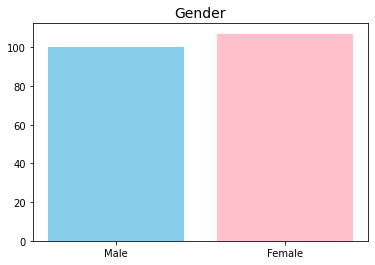

Count of Male:  100
Count of Female:  107


In [15]:
#bar plot for Gender column
x = ['Male', 'Female']
plt.title('Gender', fontsize=14)
y = [(df['Gender']=='Male').sum(), (df['Gender']=='Female').sum()]
plt.bar(x,y, color=['skyblue', 'pink'])
plt.show()
print("Count of Male: ", (df['Gender']=='Male').sum())
print("Count of Female: ", (df['Gender']=='Female').sum())

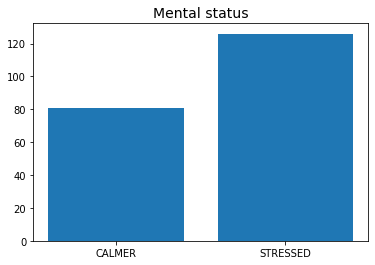

In [16]:
#bar plot for calmer_stressed column
x = ['CALMER', 'STRESSED']
plt.title('Mental status', fontsize=14)
y = [(df['calmer_stressed']=='CALMER').sum(), (df['calmer_stressed']=='STRESSED').sum()]
plt.bar(x,y)
plt.show()

In [17]:
#get unique values in Occupation Column
occ= df.Occupation.unique()
occ

array(['Tutor', 'HR', 'Engineer', 'Recruiter', 'Business', 'Marketing ',
       'Manager'], dtype=object)

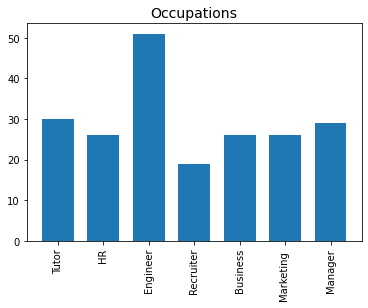

In [18]:
a=[]
b=[]
plt.title('Occupations', fontsize=14)
for i in occ:
  a.append(i)
  b.append((df['Occupation']==i).sum())

plt.bar(a,b, width=0.7)
plt.xticks(rotation='vertical')
plt.show()

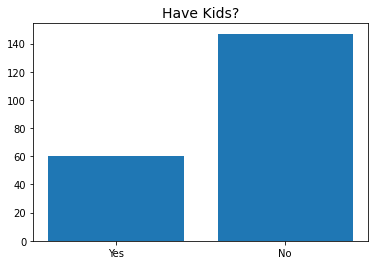

In [19]:
#bar plot for kids column
x = ['Yes', 'No']
plt.title('Have Kids?', fontsize=14)
y = [(df['kids']=='Yes').sum(), (df['kids']=='No').sum()]
plt.bar(x,y)
plt.show()

In [20]:
pro= df.RM_productive.unique()
pro

array([5, 2, 4, 3, 1])

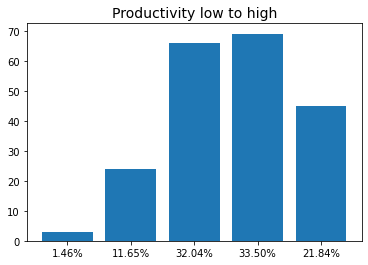

In [21]:
#bar plot for percentage of members find working remotely productive
a=[]
b=[]
pro.sort()
for i in pro:
  x= (((df['RM_productive']==i).sum())/206)*100
  a.append(str("{0:.2f}".format(x))+'%')
  b.append((df['RM_productive']==i).sum())
plt.title('Productivity low to high', fontsize=14)
plt.bar(a,b)
plt.show()

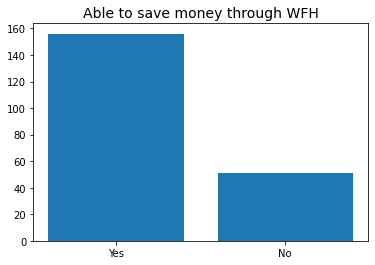

Count of people able to save money : 156
Count of people not able to save money : 51


In [22]:
#bar plot for RM_Save_money column
x = ['Yes', 'No']
plt.title('Able to save money through WFH', fontsize=14)
y = [(df['RM_save_money']=='Yes').sum(), (df['RM_save_money']=='No').sum()]
plt.bar(x,y)
plt.show()

print("Count of people able to save money :", (df['RM_save_money']=='Yes').sum())
print("Count of people not able to save money :", (df['RM_save_money']=='No').sum())

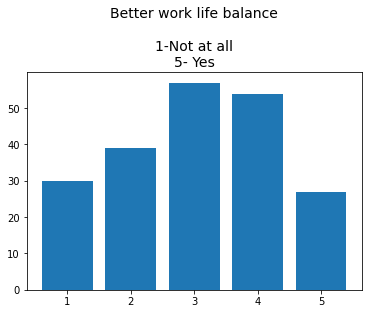

In [23]:
#bar plot for count of employees able to balance the work remotely
wlb= df.RM_better_work_life_balance.unique()

a=[]
b=[]
wlb.sort()
for i in wlb:
  x= (((df['RM_better_work_life_balance']==i).sum())/206)*100
  a.append(i)
  b.append((df['RM_better_work_life_balance']==i).sum())
plt.title("Better work life balance\n\n1-Not at all\n5- Yes", fontsize=14)
plt.bar(a,b)
plt.show()

**FINDING CATEGORICAL COLUMNS**


In [24]:
cat = df.select_dtypes(include=['object']).copy()

In [25]:
cc= cat.columns

In [26]:
cc

Index(['Occupation', 'Gender', 'Same_ofiice_home_location', 'kids',
       'RM_save_money', 'RM_quality_time', 'RM_better_sleep',
       'calmer_stressed', 'digital_connect_sufficient',
       'RM_job_opportunities'],
      dtype='object')

**CONVERSION OF CATEGORICAL TO NUMERIC**


In [27]:
le = preprocessing.LabelEncoder()
for i in cc:
  df[i]=le.fit_transform(df[i])

In [28]:
df

,ID,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,6,0,1,1,1,1,1,0,5,1,5,1,5,5,2,1
1,2,6,1,0,0,0,0,0,0,2,2,2,0,3,3,0,1
2,3,2,0,1,1,1,1,1,0,3,3,4,0,5,3,0,1
3,4,1,0,1,0,1,1,0,1,3,4,4,0,4,5,2,0
4,5,5,1,1,0,0,1,0,1,3,3,5,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,1,0,1,1,1,1,1,0,4,1,5,1,3,3,1,1
203,204,0,1,1,1,1,1,1,0,4,4,4,1,5,3,0,1
204,205,4,1,1,0,1,1,0,1,4,4,4,0,4,3,1,0
205,206,4,0,0,1,1,0,0,1,5,3,5,1,1,3,0,0


In [29]:
y = df.Target

In [30]:
y

0      1
1      1
2      1
3      0
4      1
      ..
202    1
203    1
204    0
205    0
206    0
Name: Target, Length: 207, dtype: int64

In [31]:
X = df.drop('Target',axis = 1)

In [32]:
X

,ID,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities
0,1,6,0,1,1,1,1,1,0,5,1,5,1,5,5,2
1,2,6,1,0,0,0,0,0,0,2,2,2,0,3,3,0
2,3,2,0,1,1,1,1,1,0,3,3,4,0,5,3,0
3,4,1,0,1,0,1,1,0,1,3,4,4,0,4,5,2
4,5,5,1,1,0,0,1,0,1,3,3,5,1,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,1,0,1,1,1,1,1,0,4,1,5,1,3,3,1
203,204,0,1,1,1,1,1,1,0,4,4,4,1,5,3,0
204,205,4,1,1,0,1,1,0,1,4,4,4,0,4,3,1
205,206,4,0,0,1,1,0,0,1,5,3,5,1,1,3,0


**TRAIN TEST SPLIT**

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [34]:
X_train.shape

(165, 16)

In [35]:
X_test.shape

(42, 16)

In [36]:
X_train

,ID,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities
104,105,4,1,0,0,1,1,1,0,3,4,3,0,3,2,1
193,194,4,0,1,0,1,1,1,0,1,1,5,1,5,4,1
4,5,5,1,1,0,0,1,0,1,3,3,5,1,4,2,2
74,75,5,1,1,0,0,1,0,1,3,3,5,1,4,2,2
135,136,4,1,1,0,1,1,0,1,4,4,4,0,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,4,0,0,1,1,0,0,1,5,3,5,1,1,3,0
192,193,0,1,1,1,1,1,1,0,4,4,4,1,5,3,0
117,118,1,1,0,0,0,0,0,1,4,4,2,0,2,2,1
47,48,0,0,0,0,1,0,0,1,4,4,4,1,1,4,2


In [37]:
X_test

,ID,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities
12,13,0,0,0,0,1,1,1,0,1,2,3,1,5,3,2
80,81,1,0,1,0,1,1,0,1,4,4,4,0,4,4,2
33,34,3,0,0,0,1,0,0,1,3,5,5,1,1,4,1
5,6,5,1,0,0,1,1,1,0,3,3,3,0,3,5,2
162,163,3,1,0,0,1,1,1,0,3,3,4,1,4,4,0
83,84,5,0,0,0,1,0,0,1,4,4,3,0,3,3,1
116,117,0,0,0,0,1,0,0,1,4,4,4,1,1,4,2
122,123,4,1,1,0,0,0,0,1,4,5,3,0,2,3,2
90,91,4,1,1,1,0,1,0,1,2,1,3,0,3,2,0
131,132,2,0,2,1,1,0,0,1,5,3,5,1,1,3,0


**STANDARDISATION**

In [38]:
Standardisation = preprocessing.StandardScaler()
xtrain = Standardisation.fit_transform(X_train)
xtest = Standardisation.fit_transform(X_test)

In [39]:
from sklearn import metrics
# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model.fit(xtrain, y_train)
  
prediction = svc_model .predict(xtest)
print(metrics.accuracy_score(y_test,prediction)*100)

90.47619047619048
